In [1]:
import librosa
import matplotlib.pyplot as plt
import numpy as np
import scipy

# Q4_audio
 - Trying to Compute the threshold in Voiced Unvoiced Detection

In [2]:
def num_frames(y, sr, window_dur,shift_dur):
    i = 0
    frames = []
    t =np.array(range(len(y)))/sr
    print(len(y),len(t))
    frame_length = int(np.round((sr * window_dur) / 1000))
    shift_length = int(np.round((sr * shift_dur) / 1000))
    times =[]
    while i < len(y):
        frame = y[i:i + frame_length]
        times.append((t[i:i+frame_length]))
        i = i + shift_length
        frames.append(frame)
    return frames,times

In [3]:
audio_file = "../wavs/q4_audio.wav"
y, sr = librosa.load(audio_file)
frames,times = num_frames(y,sr,20,10)
print(len(frames))

14112 14112
65


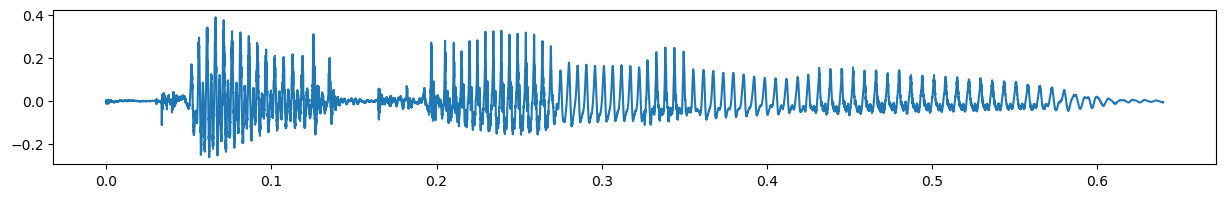

In [4]:
t =np.array(range(len(y)))/sr
fig,ax = plt.subplots(figsize = (15,2))
ax.plot(t,y);

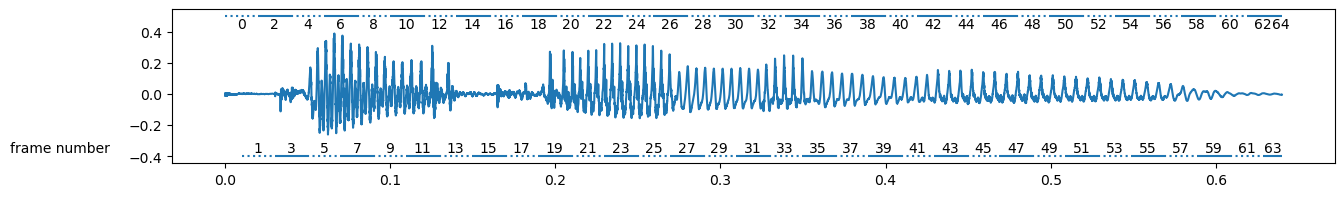

In [5]:
fig,ax = plt.subplots(figsize = (15,2))
ax.plot(t,y);
i_even = 0
i_odd = 0
for i in range(len(frames)):
    if( i & 1):
        if(i_even):
            temp = "solid"
        else:
            temp = "dotted"
        ax.hlines(y=[-0.4],xmin = times[i][0],xmax = times[i][-1],linestyles=temp)
        ax.text(x=(times[i][0] + times[i][-1]) / 2, y=-0.4+0.05, s=str(i), ha='center', va='center')
        i_even = not (i_even)
    else:
        if(i_odd):
            temp = "solid"
        else:
            temp = "dotted"
        i_odd = not (i_odd)
        ax.hlines(y=[0.5],xmin = times[i][0],xmax = times[i][-1],linestyles=temp)
        ax.text(x=(times[i][0] + times[i][-1]) / 2, y=0.5-0.05, s=str(i), ha='center', va='center')
ax.text(x = -0.1,y = -0.4+0.05,s="frame number",ha = 'center',va ='center');
        

### Three Methods for voiced Unvoiced Detection are:-
 - Energy Threshold
 - Auto-correlation
 - Normalized Linear Prediction error Analysis

In [6]:

def energy(signal):
    energy = np.sum(signal ** 2)
    return energy

def autocorrelation(signal):
    autocorr = np.correlate(signal, signal, mode='full')
    return np.sum(autocorr**2)

def norm_LP_error(signal, o):
    a = librosa.lpc(signal, order=o)
    b = np.hstack([[0], -1 * a[1:]])
    y_hat = scipy.signal.lfilter(b, [1], signal)
    prediction_error = np.var(y_hat - signal)
    signal_power = np.var(signal)
    normalized_error = prediction_error / signal_power
    return normalized_error
# norm_LP_error => form librosa.lpc documentation


In [7]:
energy_thresholds = []
autocorrelations = []
normalized_errors = []
for frame in frames:
    energy_thresholds.append(energy(frame))
    autocorrelations.append(autocorrelation(frame))
    normalized_errors.append(norm_LP_error(frame,8))

In [8]:
names = ['energy_thresholds','autocorrelations','normalized_errors']
averages=[]
for method in [ energy_thresholds,autocorrelations,normalized_errors]:
    averages.append(np.sum(method)/len(method))
thresholds = averages[:]

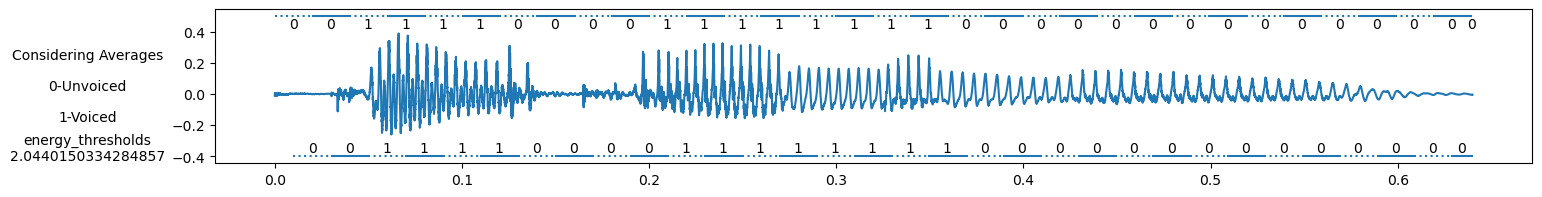

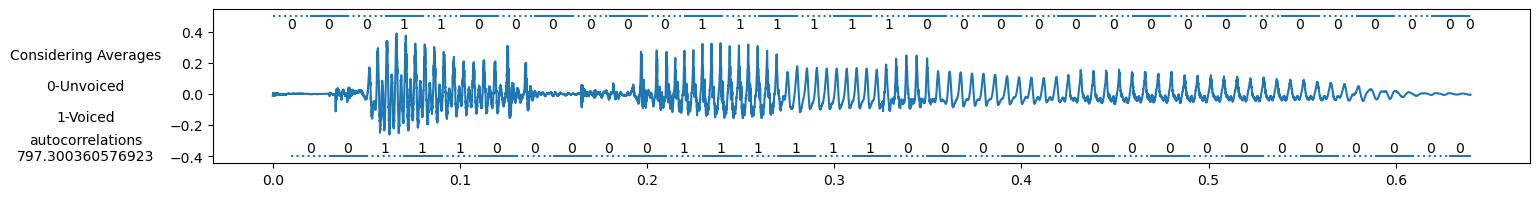

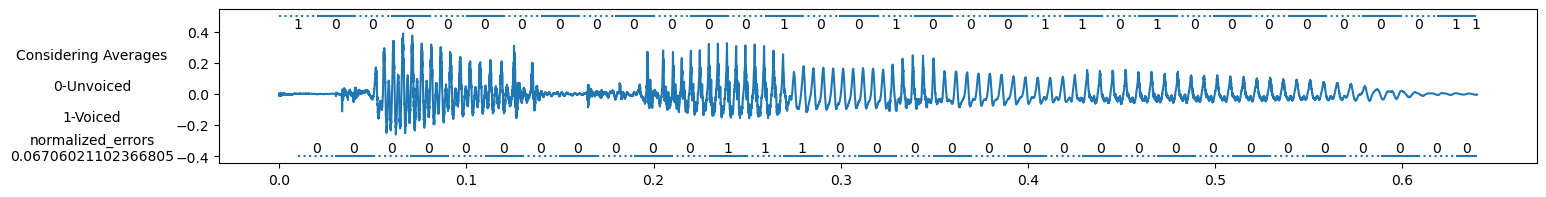

In [9]:

a = 0
for method in [ energy_thresholds,autocorrelations,normalized_errors]:
    fig,ax = plt.subplots(figsize = (17,2))
    ax.plot(t,y);
    i_even = 0
    i_odd = 0
    for i in range(len(frames)):
        if( i & 1):
            if(i_even):
                temp = "solid"
            else:
                temp = "dotted"
            ax.hlines(y=[-0.4],xmin = times[i][0],xmax = times[i][-1],linestyles=temp)
            boolean = 0
            if(method[i]>averages[a]):
                boolean =1
            ax.text(x=(times[i][0] + times[i][-1]) / 2, y=-0.4+0.05, s=str(boolean), ha='center', va='center')
            i_even = not (i_even)
        else:
            if(i_odd):
                temp = "solid"
            else:
                temp = "dotted"
            i_odd = not (i_odd)
            boolean = 0
            if(method[i]>averages[a]):
                boolean =1
            ax.hlines(y=[0.5],xmin = times[i][0],xmax = times[i][-1],linestyles=temp)
            ax.text(x=(times[i][0] + times[i][-1]) / 2, y=0.5-0.05, s=str(boolean), ha='center', va='center')
    ax.text(x = -0.1,y = -0.4+0.05,s=f"{names[a]}\n{averages[a]}",ha = 'center',va ='center');
    ax.text(x = -0.1,y = -0.2+0.05,s=f"1-Voiced",ha = 'center',va ='center');
    ax.text(x = -0.1,y = -0.0+0.05,s=f"0-Unvoiced",ha = 'center',va ='center');
    ax.text(x = -0.1,y = 0.2+0.05,s=f"Considering Averages",ha = 'center',va ='center');

    a=a+1
    

## Energy Thresholding

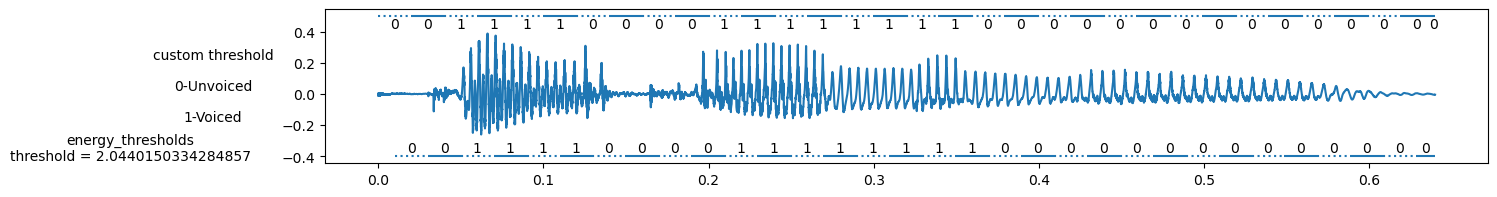

In [10]:

a = 0
for method in [energy_thresholds]:
    fig,ax = plt.subplots(figsize = (15,2))
    ax.plot(t,y);
    i_even = 0
    i_odd = 0
    for i in range(len(frames)):
        if( i & 1):
            if(i_even):
                temp = "solid"
            else:
                temp = "dotted"
            ax.hlines(y=[-0.4],xmin = times[i][0],xmax = times[i][-1],linestyles=temp)
            boolean = 0
            if(method[i]>averages[a]):
                boolean =1
            string = str(int(np.round(method[i])))
            string = boolean
            ax.text(x=(times[i][0] + times[i][-1]) / 2, y=-0.4+0.05, s=boolean, ha='center', va='center')
            i_even = not (i_even)
        else:
            if(i_odd):
                temp = "solid"
            else:
                temp = "dotted"
            i_odd = not (i_odd)
            boolean = 0
            if(method[i]>averages[a]):
                boolean =1
            string = str(int(np.round(method[i])))
            string = boolean
            ax.hlines(y=[0.5],xmin = times[i][0],xmax = times[i][-1],linestyles=temp)
            ax.text(x=(times[i][0] + times[i][-1]) / 2, y=0.5-0.05, s=string, ha='center', va='center')
    ax.text(x = -0.15,y = -0.4+0.05,s=f"{names[a]}\nthreshold = {averages[a]}",ha = 'center',va ='center');
    ax.text(x = -0.1,y = -0.2+0.05,s=f"1-Voiced",ha = 'center',va ='center');
    ax.text(x = -0.1,y = -0.0+0.05,s=f"0-Unvoiced",ha = 'center',va ='center');
    ax.text(x = -0.1,y = 0.2+0.05,s=f"custom threshold",ha = 'center',va ='center');
    a=a+1
    

## Auto Correlation

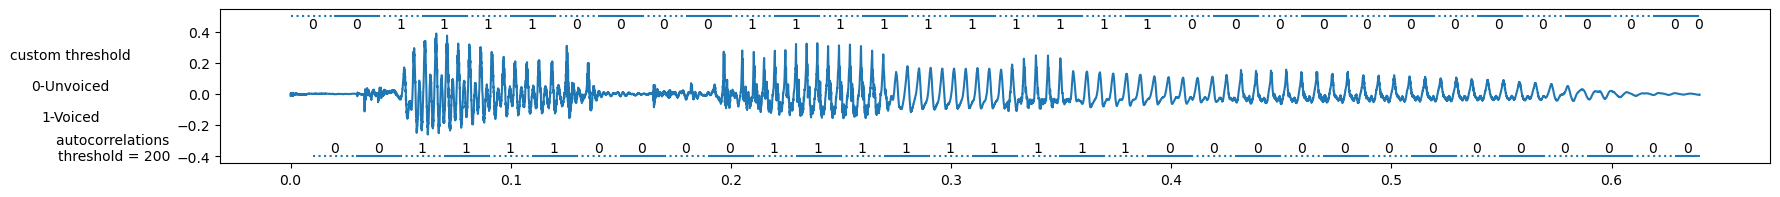

In [11]:
a = 1
for method in [autocorrelations]:
    fig,ax = plt.subplots(figsize = (20,2))
    ax.plot(t,y);
    i_even = 0
    i_odd = 0
    for i in range(len(frames)):
        if( i & 1):
            if(i_even):
                temp = "solid"
            else:
                temp = "dotted"
            ax.hlines(y=[-0.4],xmin = times[i][0],xmax = times[i][-1],linestyles=temp)
            boolean = 0
            if(method[i]>200):
                boolean =1
            string = str(int(np.round(method[i])))
            string = boolean
            ax.text(x=(times[i][0] + times[i][-1]) / 2, y=-0.4+0.05, s=string, ha='center', va='center')
            i_even = not (i_even)
        else:
            if(i_odd):
                temp = "solid"
            else:
                temp = "dotted"
            i_odd = not (i_odd)
            boolean = 0
            if(method[i]>200):
                boolean =1
            string = str(int(np.round(method[i])))
            string = boolean
            ax.hlines(y=[0.5],xmin = times[i][0],xmax = times[i][-1],linestyles=temp)
            ax.text(x=(times[i][0] + times[i][-1]) / 2, y=0.5-0.05, s=string, ha='center', va='center')
    ax.text(x = -0.08,y = -0.4+0.05,s=f"{names[a]} \nthreshold = {200}",ha = 'center',va ='center');
    ax.text(x = -0.1,y = -0.2+0.05,s=f"1-Voiced",ha = 'center',va ='center');
    ax.text(x = -0.1,y = -0.0+0.05,s=f"0-Unvoiced",ha = 'center',va ='center');
    ax.text(x = -0.1,y = 0.2+0.05,s=f"custom threshold",ha = 'center',va ='center');
    thresholds[a] = 200
    a=a+1
    

## Normalized LPC Error

In [12]:
temp_norm_error  = np.array(normalized_errors)*100

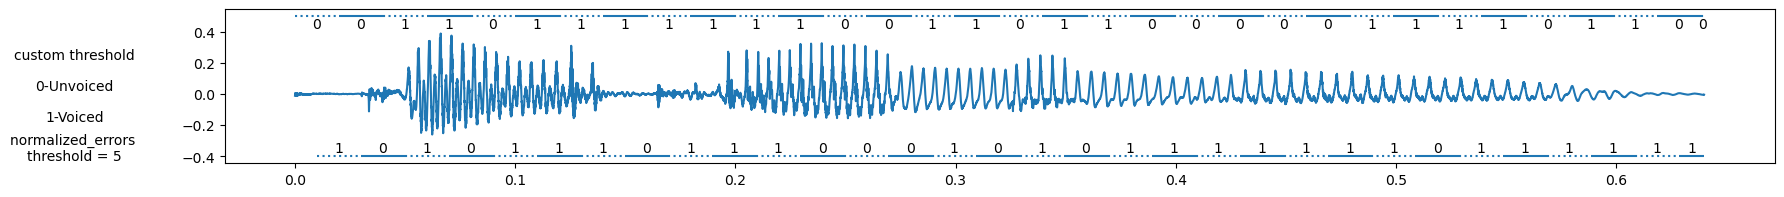

In [13]:
a = 2
for method in [temp_norm_error]:
    fig,ax = plt.subplots(figsize = (20,2))
    ax.plot(t,y);
    i_even = 0
    i_odd = 0
    for i in range(len(frames)):
        if( i & 1):
            if(i_even):
                temp = "solid"
            else:
                temp = "dotted"
            ax.hlines(y=[-0.4],xmin = times[i][0],xmax = times[i][-1],linestyles=temp)
            boolean = 0
            if(method[i]<=5):
                boolean =1
            string = str(int(np.round(method[i])))
            string = boolean
            ax.text(x=(times[i][0] + times[i][-1]) / 2, y=-0.4+0.05, s=string, ha='center', va='center')
            i_even = not (i_even)
        else:
            if(i_odd):
                temp = "solid"
            else:
                temp = "dotted"
            i_odd = not (i_odd)
            boolean = 0
            if(method[i]<=5):
                boolean =1
            string = str(int(np.round(method[i])))
            string = boolean
            ax.hlines(y=[0.5],xmin = times[i][0],xmax = times[i][-1],linestyles=temp)
            ax.text(x=(times[i][0] + times[i][-1]) / 2, y=0.5-0.05, s=string, ha='center', va='center')
    ax.text(x = -0.1,y = -0.4+0.05,s=f"{names[a]} \nthreshold = {5}",ha = 'center',va ='center');
    ax.text(x = -0.1,y = -0.2+0.05,s=f"1-Voiced",ha = 'center',va ='center');
    ax.text(x = -0.1,y = -0.0+0.05,s=f"0-Unvoiced",ha = 'center',va ='center');
    ax.text(x = -0.1,y = 0.2+0.05,s=f"custom threshold",ha = 'center',va ='center');
    thresholds[a] = 0.05
    a=a+1
    

In [14]:
my_array = np.array(thresholds)
np.save('thresholds.npy', my_array)